<div align="center">
  <img src="images/coca.png" width="300">
</div>


# 🥤 Coca-Cola Sales & Operating Profit Analysis (Python Edition)

This project presents an exploratory data analysis (EDA) of Coca-Cola’s beverage sales and operating profit across various U.S. retailers, states, and time periods using Python. The analysis is designed to extract actionable business insights using popular data analysis libraries.

## 📌 Overview

The dataset contains real-world sales and profit records across:

- U.S. **Retailers** (e.g., Walmart, CVS)  
- **States** and **Geographic Regions**  
- **Beverage Products** (e.g., Coca-Cola, Diet Coke, Dasani, Sprite, Fanta, Powerade)  
- **Operating Profit** and **Units Sold**  
- **Monthly and Seasonal Trends**

The goal of this project is to explore patterns in Coca-Cola’s performance, uncover trends, and build a strong foundation for data-driven decision-making.

## 🥤 About Coca-Cola

[Coca-Cola](w) is a flagship beverage brand of The Coca-Cola Company, founded in 1886 and headquartered in Atlanta, Georgia. It is one of the most recognized soft drinks in the U.S. and globally. With a wide portfolio that includes Diet Coke, Sprite, Fanta, and Dasani, Coca-Cola continues to play a dominant role in the U.S. beverage market—making it ideal for performance and sales trend analysis.


## 🎯 Project Objective

To evaluate Coca-Cola’s sales and profit performance using Python-based data analysis techniques and provide a business-oriented perspective based on the findings.

## 💡 Personal Interest

This dataset caught my attention because my mum runs a wholesale business that distributes Coca-Cola products. It gave me a chance to connect data analysis with real-world experience while sharpening my Python skills.

## ❓ Business Questions

The analysis is guided by the following business questions:

1. What are the top 3 beverage brands by total units sold?
2. Which U.S. regions generate the highest operating profit?
3. Which 5 cities drive the most sales or profit?
4. How do sales and profits trend throughout the year?
5. How does each brand perform based on operating margin?

## 🗃️ Dataset Overview

- **Source:** Provided as part of a data analytics project  
- **Scope:** Focused on the U.S. market  
- **Key Columns:**  
  - Total Sales  
  - Operating Profit  
  - Beverage Type  
  - Retailer Name  
  - State / Region / City  
  - Delivery Method  
  - Month and Season  

## 🛠 Tools & Libraries Used

- **Python**  
- `Pandas` for data manipulation  
- `NumPy` for numerical operations  
- `Matplotlib` and `Seaborn` for data visualization  
- `Jupyter Notebook` environment  


🧰 **Import Libraries**

In this step, we will import all necessary libraries required for data analysis and visualization, such as pandas, numpy, matplotlib, seaborn, etc.

In [1]:
# import the neccessary dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re




🧾 **Load and Preview Dataset**

In this step, we will load the dataset into a pandas DataFrame and preview the first few rows to understand its structure and contents.


In [2]:
# Reading the csv file into a pandas DataFrame
coca=pd.read_csv(r"C:\Users\joshua\Documents\Data Analytics and Machine Learning Project\Cocacola Analysis\Cocacola Raw Dataset.csv")
coca.head()



,Retailer,Retailer ID,Invoice Date,Region,State,City,Beverage Brand,Days to \nDeliver,Delivery \nCompany,Price per \nUnit,Units Sold,Total Sales,Operating Profit,Operating Margin
0,Walmart,1185732,1/14/2022,Northeast,New York,New York,Coca-Cola,25,USPS,$0.50,"12,000","$6,000","$3,000",50%
1,Walmart,1185732,1/14/2022,Northeast,New York,New York,Diet Coke,34,FedEx,$0.50,"10,000","$5,000","$1,500",30%
2,Walmart,1185732,1/14/2022,Northeast,New York,New York,Sprite,48,UPS,$0.40,"10,000","$4,000","$1,400",35%
3,Walmart,1185732,1/14/2022,Northeast,New York,New York,Fanta,20,USPS,$0.45,"8,500","$3,825","$1,339",35%
4,Walmart,1185732,1/14/2022,Northeast,New York,New York,Powerade,26,USPS,$0.60,"9,000","$5,400","$1,620",30%


In [3]:
def data_overview(df):
    """ 
    Function to provide an overview of the dataset.
    It prints the first few rows, a description of the data, data types, missing values,
    shape of the data, columns, and index.
    """
    print("Data overview:")
    print(df.head())

    """_summary_
    """
    print("\nDescriptive statistics:")
    print(df.describe())

    """
    Data Information
    """
    print("\nData types:")
    print(df.info())

     
    """
    Missing Values
    """
    print("\nMissing Values:")
    print(df.isna().sum())

    """
    Duplicate
    """
    print("\nDuplicates:")
    print(df.duplicated().sum())
    

    """_summary_
    """
    print("\nData Shape:")
    print(df.shape)

    """
    Data Columns
    """
    print("\nData Columns:")
    print(df.columns.tolist())
    
data_overview(coca)


Data overview:
  Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Walmart      1185732    1/14/2022  Northeast  New York  New York   
1  Walmart      1185732    1/14/2022  Northeast  New York  New York   
2  Walmart      1185732    1/14/2022  Northeast  New York  New York   
3  Walmart      1185732    1/14/2022  Northeast  New York  New York   
4  Walmart      1185732    1/14/2022  Northeast  New York  New York   

  Beverage Brand  Days to \nDeliver Delivery \nCompany Price per \nUnit  \
0      Coca-Cola                 25               USPS           $0.50    
1      Diet Coke                 34              FedEx           $0.50    
2         Sprite                 48                UPS           $0.40    
3          Fanta                 20               USPS           $0.45    
4       Powerade                 26               USPS           $0.60    

  Units Sold Total Sales Operating Profit Operating Margin  
0     12,000     $6,000           $3,000      

🧹  **Data Cleaning and Preprocessing**

In [4]:
# Removing irrelevant columns
coca.drop(['Days to \nDeliver'], axis=1, inplace=True)

In [5]:
coca.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Beverage Brand,Delivery \nCompany,Price per \nUnit,Units Sold,Total Sales,Operating Profit,Operating Margin
0,Walmart,1185732,1/14/2022,Northeast,New York,New York,Coca-Cola,USPS,$0.50,"12,000","$6,000","$3,000",50%
1,Walmart,1185732,1/14/2022,Northeast,New York,New York,Diet Coke,FedEx,$0.50,"10,000","$5,000","$1,500",30%
2,Walmart,1185732,1/14/2022,Northeast,New York,New York,Sprite,UPS,$0.40,"10,000","$4,000","$1,400",35%
3,Walmart,1185732,1/14/2022,Northeast,New York,New York,Fanta,USPS,$0.45,"8,500","$3,825","$1,339",35%
4,Walmart,1185732,1/14/2022,Northeast,New York,New York,Powerade,USPS,$0.60,"9,000","$5,400","$1,620",30%


In [6]:
# Converting invoice Date column to datetime format
coca['Invoice Date']=pd.to_datetime(coca['Invoice Date'], errors='coerce')

# Extract the year, month and day
coca['Year']=coca['Invoice Date'].dt.year
coca['Month']=coca['Invoice Date'].dt.month
coca['Day']=coca['Invoice Date'].dt.day
coca['Weekday']= coca['Invoice Date'].dt.day_name()

In [7]:
coca.dtypes

Retailer                      object
Retailer ID                    int64
Invoice Date          datetime64[ns]
Region                        object
State                         object
City                          object
Beverage Brand                object
Delivery \nCompany            object
Price per \nUnit              object
Units Sold                    object
Total Sales                   object
Operating Profit              object
Operating Margin              object
Year                           int32
Month                          int32
Day                            int32
Weekday                       object
dtype: object

In [8]:
coca.columns=coca.columns.str.replace(' ', '_').str.lower().str.replace('\n', '', regex=True)

In [9]:
coca.columns

Index(['retailer', 'retailer_id', 'invoice_date', 'region', 'state', 'city',
       'beverage_brand', 'delivery_company', 'price_per_unit', 'units_sold',
       'total_sales', 'operating_profit', 'operating_margin', 'year', 'month',
       'day', 'weekday'],
      dtype='object')

In [10]:
coca.head()

,retailer,retailer_id,invoice_date,region,state,city,beverage_brand,delivery_company,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,year,month,day,weekday
0,Walmart,1185732,2022-01-14,Northeast,New York,New York,Coca-Cola,USPS,$0.50,"12,000","$6,000","$3,000",50%,2022,1,14,Friday
1,Walmart,1185732,2022-01-14,Northeast,New York,New York,Diet Coke,FedEx,$0.50,"10,000","$5,000","$1,500",30%,2022,1,14,Friday
2,Walmart,1185732,2022-01-14,Northeast,New York,New York,Sprite,UPS,$0.40,"10,000","$4,000","$1,400",35%,2022,1,14,Friday
3,Walmart,1185732,2022-01-14,Northeast,New York,New York,Fanta,USPS,$0.45,"8,500","$3,825","$1,339",35%,2022,1,14,Friday
4,Walmart,1185732,2022-01-14,Northeast,New York,New York,Powerade,USPS,$0.60,"9,000","$5,400","$1,620",30%,2022,1,14,Friday


In [11]:
def convert_columns(df, column_name):
  """
  Adjust a DataFrame column in an object state to a float.

  Parameters:
  - df: The DataFrame containing the column.
  - column_name: The name of the column to be adjusted.

  Returns:
  - DataFrame: The adjusted DataFrame.

  Raises:
  ValueError: If any of the parameters is empty.
  """

  # convert the column to string
  df[column_name] = df[column_name].astype(str)

  # remove non-numeric characters, and replace empty spaces with Nan, and convert to float
  df[column_name] = df[column_name].str.replace(r'[$,%]', "", regex=True).replace('', np.nan).astype(float)

  return df

In [12]:
columns_to_convert = ['price_per_unit', 'units_sold', 'total_sales', 'operating_margin', 'operating_profit' ]

for _ in columns_to_convert:
    coca = convert_columns(coca, _)

In [13]:
coca.head()

,retailer,retailer_id,invoice_date,region,state,city,beverage_brand,delivery_company,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,year,month,day,weekday
0,Walmart,1185732,2022-01-14,Northeast,New York,New York,Coca-Cola,USPS,0.50,12000.0,6000.0,3000.0,50.0,2022,1,14,Friday
1,Walmart,1185732,2022-01-14,Northeast,New York,New York,Diet Coke,FedEx,0.50,10000.0,5000.0,1500.0,30.0,2022,1,14,Friday
2,Walmart,1185732,2022-01-14,Northeast,New York,New York,Sprite,UPS,0.40,10000.0,4000.0,1400.0,35.0,2022,1,14,Friday
3,Walmart,1185732,2022-01-14,Northeast,New York,New York,Fanta,USPS,0.45,8500.0,3825.0,1339.0,35.0,2022,1,14,Friday
4,Walmart,1185732,2022-01-14,Northeast,New York,New York,Powerade,USPS,0.60,9000.0,5400.0,1620.0,30.0,2022,1,14,Friday


In [14]:
coca.isna().sum()

retailer            0
retailer_id         0
invoice_date        0
region              0
state               0
city                0
beverage_brand      0
delivery_company    0
price_per_unit      0
units_sold          0
total_sales         0
operating_profit    0
operating_margin    0
year                0
month               0
day                 0
weekday             0
dtype: int64

In [15]:
coca = coca. rename(columns={
    'price_per_unit': 'price_per_unit ($)',
    'total_sales': 'total_sales ($)',
    'operating_profit': 'operating_profit ($)',
    'operating_margin': 'operating_margin (%)'
})
    

In [16]:
coca.head()

,retailer,retailer_id,invoice_date,region,state,city,beverage_brand,delivery_company,price_per_unit ($),units_sold,total_sales ($),operating_profit ($),operating_margin (%),year,month,day,weekday
0,Walmart,1185732,2022-01-14,Northeast,New York,New York,Coca-Cola,USPS,0.50,12000.0,6000.0,3000.0,50.0,2022,1,14,Friday
1,Walmart,1185732,2022-01-14,Northeast,New York,New York,Diet Coke,FedEx,0.50,10000.0,5000.0,1500.0,30.0,2022,1,14,Friday
2,Walmart,1185732,2022-01-14,Northeast,New York,New York,Sprite,UPS,0.40,10000.0,4000.0,1400.0,35.0,2022,1,14,Friday
3,Walmart,1185732,2022-01-14,Northeast,New York,New York,Fanta,USPS,0.45,8500.0,3825.0,1339.0,35.0,2022,1,14,Friday
4,Walmart,1185732,2022-01-14,Northeast,New York,New York,Powerade,USPS,0.60,9000.0,5400.0,1620.0,30.0,2022,1,14,Friday


In [17]:
coca.dtypes

retailer                        object
retailer_id                      int64
invoice_date            datetime64[ns]
region                          object
state                           object
city                            object
beverage_brand                  object
delivery_company                object
price_per_unit ($)             float64
units_sold                     float64
total_sales ($)                float64
operating_profit ($)           float64
operating_margin (%)           float64
year                             int32
month                            int32
day                              int32
weekday                         object
dtype: object

In [18]:
coca['beverage_brand'].unique()

array(['Coca-Cola', 'Diet Coke', 'Sprite', 'Fanta', 'Powerade',
       'Dasani Water'], dtype=object)

In [19]:
coca['state'].unique()

array(['New York', 'Texas', 'California', 'Illinois', 'Pennsylvania',
       'Nevada', 'Colorado', 'Washington', 'Florida', 'Minnesota',
       'Montana', 'Tennessee', 'Nebraska', 'Alabama', 'Maine', 'Wyoming',
       'Virginia', 'Michigan', 'Missouri', 'Utah', 'Oregon', 'Louisiana',
       'Idaho', 'Arizona', 'New Mexico', 'Georgia', 'South Carolina',
       'North Carolina', 'Ohio', 'Kentucky', 'Mississippi', 'Arkansas',
       'Oklahoma', 'Kansas', 'South Dakota', 'North Dakota', 'Iowa',
       'Wisconsin', 'Indiana', 'West Virginia', 'Maryland', 'Delaware',
       'New Jersey', 'Connecticut', 'Rhode Island', 'Massachusetts',
       'Vermont', 'New Hampshire'], dtype=object)

In [20]:
coca['region'].unique()

array(['Northeast', 'South', 'West', 'Midwest', 'Southeast'], dtype=object)

### 📊  Exploratory Data Analysis (EDA)

In [21]:
sns.set_theme(style='dark')

📂 Save Plot Function – Organized Export of Visualizations

In [22]:
import os
def save_plot(filename, folder='plots', dpi=300):
    """
    Saves the current plot to a specified folder with the given filename.
    Creates the folder if it doesn't exist.
    
    Parameters:
    - filename (str): Name of the file (e.g., 'content_distribution.png')
    - folder (str): Folder to save the plot in (default: 'plots')
    - dpi (int): Resolution of the image (default: 300)
    """
    if not os.path.exists(folder):
        os.makedirs(folder)
    full_path = os.path.join(folder, filename)
    plt.savefig(full_path, dpi=dpi, bbox_inches='tight')
    print(f"Plot saved to: {full_path}")

### 1. 🏷️ Brand Analysis  
**Which are the top 3 beverage brands by total units sold?**


In [23]:
def plot_top_3_beverage_sales(dataframe):
    """
    Plots the top 3 beverage brands by total sales in descending order.

    Parameters:
    -----------
    dataframe : pandas.DataFrame
        The DataFrame containing beverage sales data. 
        Must include 'beverage_brand' and 'total_sales ($)' columns.

    Returns:
    --------
    None
    Saves the plot using the custom save_plot function and displays it.
    """

    # Calculate top 3 beverage brands by total sales
    brand_sales = (
        dataframe.groupby('beverage_brand')['total_sales ($)']
        .sum()
        .sort_values(ascending=False)
        .head(3)
    )

    # Define brand-specific colors (Coca-Cola, Dasani, Diet Coke)
    brand_colors = ['#E4002B', '#0072C6', '#A6A6A6']

    # Plotting
    brand_sales.plot(
        kind='bar',
        color=brand_colors,
        title='Top 3 Beverage Brands by Total Sales'
    )
    
    plt.grid()
    plt.xlabel('Beverage Brand')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Save and show plot using custom function
    save_plot('Top 3 Beverage Brands by Total Sales.png')
    plt.show()


Plot saved to: plots\Top 3 Beverage Brands by Total Sales.png


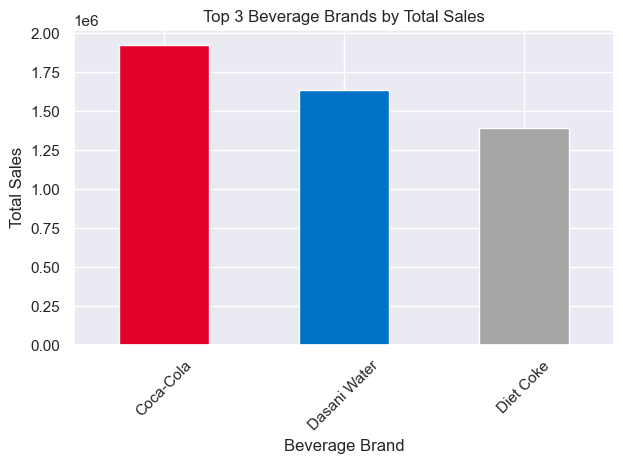

In [24]:
plot_top_3_beverage_sales(coca)

### 🔍 Insight: Top 3 Beverage Brands by Total Sales

- 🟥 **Coca-Cola** leads the beverage market with the highest total sales, reflecting strong brand dominance and consumer loyalty.

- 💧 **Dasani Water** follows closely behind, indicating a high demand for bottled water among consumers.

- ⚪🥤 **Diet Coke** ranks third, maintaining a steady presence with its appeal to health-conscious, low-calorie drinkers.

> **Note:** Here, "Coca-Cola" represents the classic cola drink (often called Coke), not the entire Coca-Cola Company. Other brands like Diet Coke, Sprite, and Fanta are analyzed separately.
---

### ✅ Recommendation

- **Increase inventory** and promotional focus on Coca-Cola and Dasani Water in high-performing regions to maximize revenue.
- **Explore targeted marketing** for Diet Coke, especially among health-conscious demographics to boost its visibility and engagement.
- **Monitor seasonal trends** to identify opportunities where bottled water or diet drinks surge, and adjust supply accordingly.


### 2. 📊 What is the distribution of Total Sales and Operating Profit by Region?


In [25]:
coca['region'].unique()

array(['Northeast', 'South', 'West', 'Midwest', 'Southeast'], dtype=object)

In [26]:
def plot_region_sales_vs_profit(dataframe):
    """
    Plots a comparison of total sales and operating profit by region.

    Parameters:
    -----------
    dataframe : pandas.DataFrame
        The DataFrame containing sales and profit data.
        Must include 'region', 'total_sales ($)', and 'operating_profit ($)' columns.

    Returns:
    --------
    None
    Saves the plot using the custom save_plot function and displays it.
    """

    # Group data and sort by operating profit
    top_regions = (
        dataframe.groupby('region')[['total_sales ($)', 'operating_profit ($)']]
        .sum()
        .sort_values(by='operating_profit ($)', ascending=False)
    )

    # Define custom colors for bars
    custom_colors = ['#e41c1c', '#777777']  # Coca-Cola Red and Neutral Gray

    # Plot bar chart
    label = top_regions.plot(
        kind='bar',
        figsize=(10, 6),
        color=custom_colors
    )

    # Customize plot appearance
    plt.title('Regional Comparison: Total Sales vs Operating Profit')
    plt.grid()
    plt.xlabel('Region')
    plt.ylabel('Amount ($)')
    plt.xticks(rotation=0)
    plt.legend(title='Metric', loc='upper right')
    plt.tight_layout()

    # Add value labels to bars
    for container in label.containers:
        label.bar_label(container, fmt='%.0f', padding=3)

    # Save and show plot
    save_plot('Regional Comparison.png')
    plt.show()


Plot saved to: plots\Regional Comparison.png


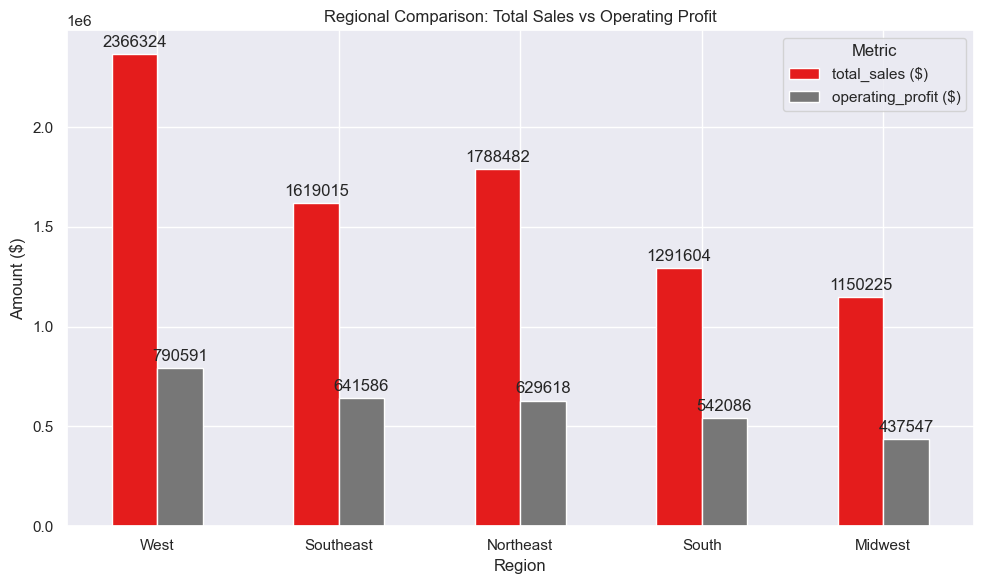

In [27]:
plot_region_sales_vs_profit(coca)

### 🔍 Insight  
From the regional comparison chart above:

- 🥇 **West** region leads in both **total sales** and **operating profit** , showing strong market presence and revenue performance.
- 📊 **Southeast** and **Northeast** also perform well, contributing significantly to overall profit.
- ⚠️ **Midwest** shows the lowest figures in both sales and profit, which may indicate underperformance or smaller market size.

---

### ✅ Recommendation  
Focus on:

- 🔁 **Strengthening sales strategies** in high-performing regions like the West to maintain dominance.
- 🚀 **Boosting Midwest performance** through targeted marketing, better distribution, or cost reduction strategies.


### 3. 🏙️ City-Level Performance  
**Which are the top 5 cities that drive the most total sales?**


In [28]:
coca['city'].unique()

array(['New York', 'Houston', 'San Francisco', 'Los Angeles', 'Chicago',
       'Dallas', 'Philadelphia', 'Las Vegas', 'Denver', 'Seattle',
       'Miami', 'Minneapolis', 'Billings', 'Knoxville', 'Omaha',
       'Birmingham', 'Portland', 'Orlando', 'Albany', 'Cheyenne',
       'Richmond', 'Detroit', 'St. Louis', 'Salt Lake City',
       'New Orleans', 'Boise', 'Phoenix', 'Albuquerque', 'Atlanta',
       'Charleston', 'Charlotte', 'Columbus', 'Louisville', 'Jackson',
       'Little Rock', 'Oklahoma City', 'Wichita', 'Sioux Falls', 'Fargo',
       'Des Moines', 'Milwaukee', 'Indianapolis', 'Baltimore',
       'Wilmington', 'Newark', 'Hartford', 'Providence', 'Boston',
       'Burlington', 'Manchester'], dtype=object)

In [29]:
def plot_top_5_cities_by_sales(dataframe):
    """
    Plots the top 5 cities by total sales using a horizontal bar chart.

    Parameters:
    -----------
    dataframe : pandas.DataFrame
        The DataFrame containing city-level sales data.
        Must include 'city' and 'total_sales ($)' columns.

    Returns:
    --------
    None
    Saves the plot using the custom save_plot function and displays it.
    """

    # Get top 5 cities by total sales
    top_cities = (
        dataframe.groupby('city')['total_sales ($)']
        .sum()
        .sort_values(ascending=False)
        .head(5)
    )

    # Plot horizontal bar chart
    top_cities.plot(
        kind='barh',
        color='#E41A1C',  # Coca-Cola Red
        figsize=(8, 5)
    )

    # Customize chart appearance
    plt.title('Top 5 Cities by Total Sales')
    plt.grid()
    plt.xlabel('Total Sales ($)')
    plt.ylabel('City')
    plt.gca().invert_yaxis()  # Highest at the top
    plt.tight_layout()

    # Save and show plot
    save_plot('Top 5 Cities by Total Sales.png')
    plt.show()


Plot saved to: plots\Top 5 Cities by Total Sales.png


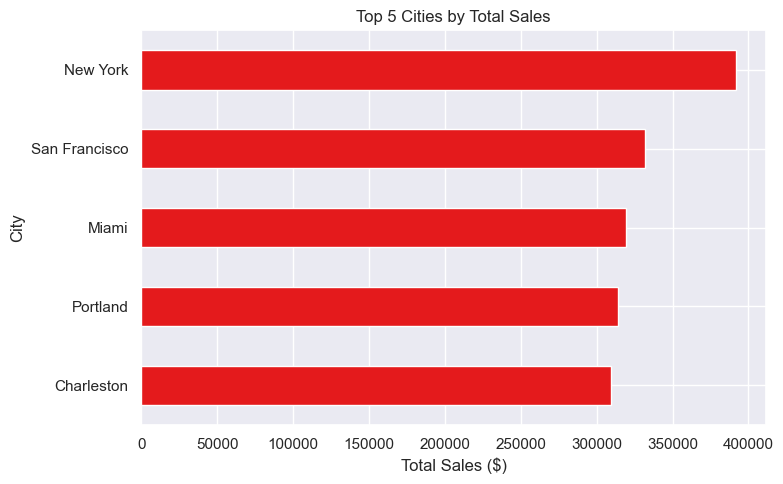

In [30]:
plot_top_5_cities_by_sales(coca)

### 🔍 Insight  
The analysis reveals that the following cities drive the highest Coca-Cola sales:

- 🗽 **New York** leads with the highest total sales, making it a major revenue hub.
- 🌉 **San Francisco**, 🌴 **Miami**, 🌲 **Portland**, and ⚓ **Charleston** also rank among the top performers.

These cities represent key urban markets with strong customer demand and consistent beverage movement.

---

### ✅ Recommendation  
- 🧭 **Prioritize these top-performing cities** for inventory planning, marketing campaigns, and supply chain optimization.
- 📌 Investigate local factors (e.g., climate, customer demographics, event seasons) influencing high sales to replicate similar strategies in other cities.
- 📦 Ensure timely delivery and availability of products to meet demand and maintain customer satisfaction in these regions.


### 4. 📈📉 Trend Analysis 
**How do sales and profits trend throughout the year?**

In [31]:
def plot_monthly_sales_and_profit_trends(dataframe):
    """
    Plots monthly trends in total sales and operating profit using a line chart.

    Parameters:
    -----------
    dataframe : pandas.DataFrame
        A DataFrame that includes 'invoice_date', 'total_sales ($)', and 'operating_profit ($)' columns.

    Returns:
    --------
    None
    Saves the plot using the custom save_plot function and displays it.
    """

    dataframe['Month_Name'] = dataframe['invoice_date'].dt.strftime('%B')

    sales_by_month = (
        dataframe.groupby(['month', 'Month_Name'])[['total_sales ($)', 'operating_profit ($)']]
        .sum()
        .reset_index()
        .sort_values(by='month')
    )

    plt.figure(figsize=(12, 6))

    # Total Sales in Coca-Cola red
    sns.lineplot(
        data=sales_by_month,
        x='Month_Name',
        y='total_sales ($)',
        marker='o',
        label='Total Sales ($)',
        color='#E41A1C'  # Coca-Cola Red
    )

    # Operating Profit in Coke dark gray
    sns.lineplot(
        data=sales_by_month,
        x='Month_Name',
        y='operating_profit ($)',
        marker='o',
        label='Operating Profit ($)',
        color='#333333'  # Coke dark gray
    )

    plt.title('Monthly Trends in Sales and Operating Profit', fontsize=14)
    plt.xlabel('Month')
    plt.ylabel('Amount ($)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()

    save_plot('Monthly Trends in Sales and Operating Profit.png')
    plt.show()


Plot saved to: plots\Monthly Trends in Sales and Operating Profit.png


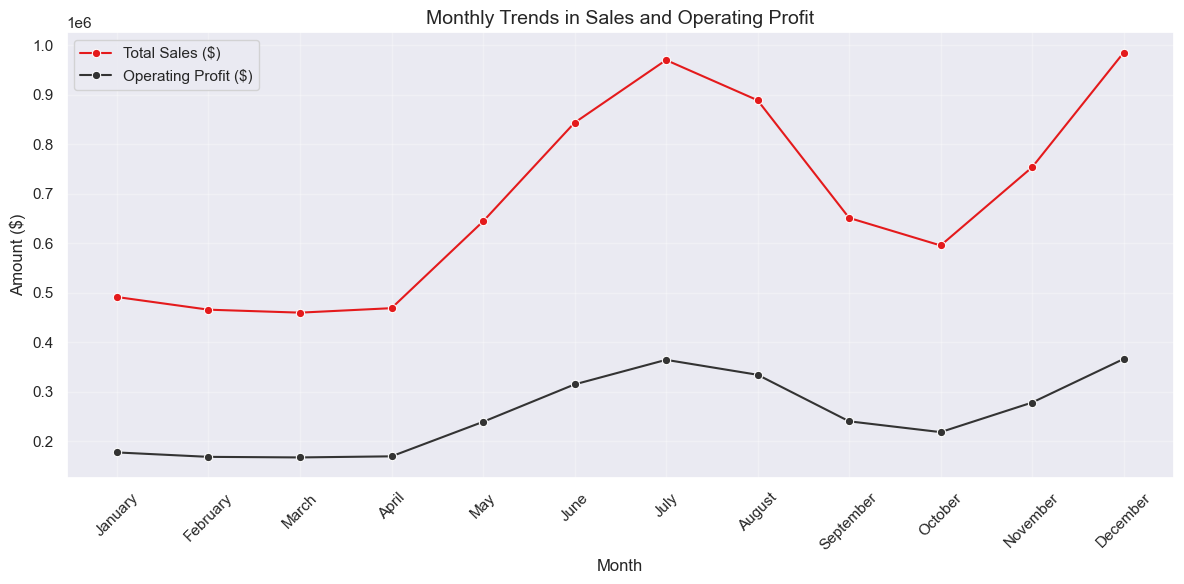

In [32]:
plot_monthly_sales_and_profit_trends(coca)

### 📊 Insight: 

- **Peak performance** occurs during **May–July (summer)** and **November–December (holiday season)**, with high total sales and operating profit.
- **Low performance periods** are seen in **January–April** and **August–October**, indicating seasonal dips in consumer demand.
- The pattern shows that **weather and celebrations significantly influence buying behavior**, with hot months and festive seasons driving more Coca-Cola purchases.
- Operating profit rises and falls in line with total sales, reflecting strong efficiency in converting revenue into profit.

---

### ✅ Recommendations: 

#### 1. ☀️ Maximize Sales During High-Demand Periods
- Intensify marketing campaigns and promotional offers during **summer and holidays**.
- Boost distribution efforts to ensure **product availability and visibility** at retail and cold points.
- Launch seasonal product tie-ins (e.g., branded chillers, giveaways) to boost volume sales.

#### 2. 🧊 Stimulate Demand in Slow Months
- Introduce **bundle offers** (e.g., Coke + bottled water or snacks) to keep customers engaged.
- Run **targeted promotions** (like back-to-school or mid-year refreshment deals) to encourage purchases.
- Promote alternative products (like juices or smaller-size bottles) to diversify appeal during lower demand periods.

#### 3. ⚙️ Improve Operational Planning
- Use trend data to **forecast demand** and align production accordingly.
- **Stock up before peak seasons** to avoid shortages and delivery delays.
- Reduce overproduction in slow months to **minimize storage costs and product waste**.

#### 4. 🎯 Explore Micro-Opportunities Using Data
- Analyze sales by **region, product, and delivery company** to identify gaps or untapped potential.
- Pilot localized campaigns in **underperforming cities** and monitor response before scaling up.

> 📌 Aligning operational decisions and marketing strategies with clear seasonal trends will help Coca-Cola optimize sales, reduce waste, and increase annual profitability.


### 5.🥤 Brand Profitability Analysis

**How does each beverage brand perform based on operating margin (%)?** 📈

This helps identify which brands are the most profitable per dollar sold — not just in volume, but in actual business value.


In [33]:
def plot_brand_performance_by_margin(dataframe):
    """
    Plots beverage brand performance based on average operating margin (%) using a horizontal bar chart.

    Parameters:
    -----------
    dataframe : pandas.DataFrame
        A DataFrame that includes 'beverage_brand' and 'operating_margin (%)' columns.

    Returns:
    --------
    None
    Saves the plot using the custom save_plot function and displays it.
    """

    # Group by brand and calculate average operating margin
    brand_margin = (
        dataframe.groupby('beverage_brand')['operating_margin (%)']
        .mean()
        .sort_values(ascending=False)
    )

    # Plot horizontal bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(brand_margin.index, brand_margin.values, color='#E41A1C')  # Coca-Cola Red

    plt.title('Beverage Brand Performance by Operating Margin (%)', fontsize=14)
    plt.xlabel('Average Operating Margin (%)')
    plt.ylabel('Beverage Brand')
    plt.grid()
    plt.gca().invert_yaxis()
    plt.tight_layout()

    # Save and show plot
    save_plot('Beverage Brand Performance by Operating Margin(%).png')
    plt.show()


Plot saved to: plots\Beverage Brand Performance by Operating Margin(%).png


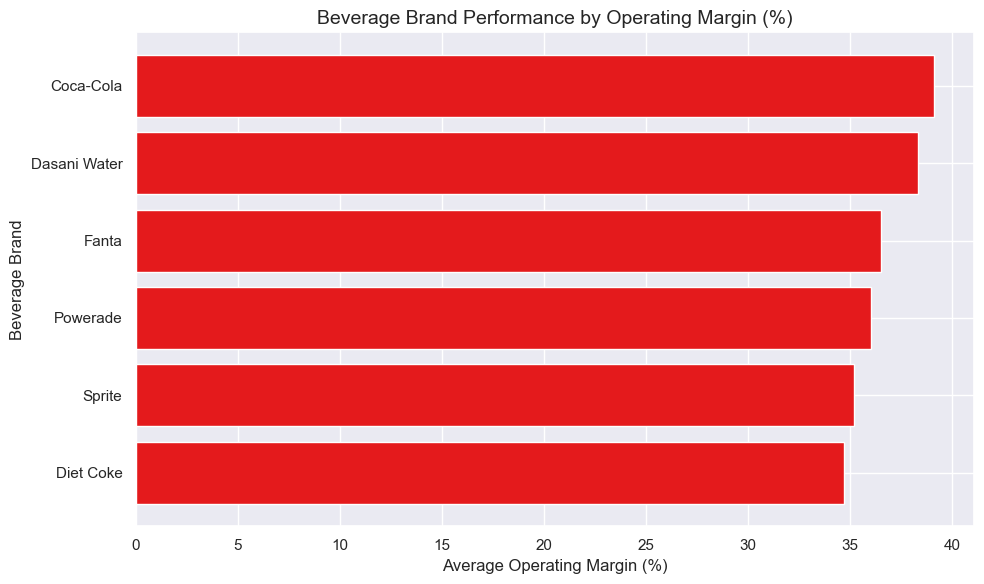

In [34]:
plot_brand_performance_by_margin(coca)

**Insight** 📊  
Coca-Cola and Dasani Water stand out as the most profitable brands based on average operating margin. They are followed closely by Fanta and Powerade, with Diet Coke and Sprite showing relatively lower efficiency in converting sales into profit.

This suggests that while all brands contribute to overall revenue, some are much more cost-effective and profitable per unit sold.

> **Note:** Here, "Coca-Cola" represents the classic cola drink (often called Coke), not the entire Coca-Cola Company.
---

**Recommendation** ✅

- Prioritize and scale high-margin brands through targeted promotions and stock availability.
- Evaluate cost structures or pricing strategies for lower-margin brands to improve overall profitability.
- During slower sales periods, promote high-margin products to maintain strong financial performance.

> 💡 Understanding which products are not just popular but profitable can help maximize returns with smarter decisions.


## 🧾 Summary of Findings

- 🥤 **Coca-Cola, Dasani Water, and Diet Coke** are the top-selling beverage brands, with Coca-Cola leading in total sales and brand influence.

- 🌍 **The West region** dominates in both sales and profit, while the **Southeast and Northeast** also contribute strongly. The **Midwest** underperforms comparatively.

- 🏙️ **New York, San Francisco, Miami, Portland, and Charleston** are key revenue-driving cities, highlighting strong urban demand.

- 📅 **Sales and profit peak during summer (May–July)** and the **holiday season (Nov–Dec)**, influenced by weather and celebrations.  

- 💰 **Coca-Cola and Dasani Water** are also the most **profitable brands** by operating margin, indicating high cost-efficiency.

*Note: "Coca-Cola" refers to the classic cola drink (coke), not the entire company portfolio.*


In [35]:
# Save the cleaned Dataset
coca.to_csv('Coca-cola_cleaned.csv', index=False)